In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')

In [3]:
train_data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [5]:
unwanted_features = ['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 
                     'MaxOfUpperTRange','RainingDays', 'AverageOfLowerTRange', 'AverageOfUpperTRange'
                    'yield', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange']
imp_features = list(set(train_data.columns) - set(unwanted_features))
print(imp_features)

# for col_name in imp_features:
#     print(col_name)
#     sns.scatterplot(train_data, x=col_name, y='yield', hue=col_name)
#     plt.show()

['seeds', 'yield', 'AverageRainingDays', 'fruitset', 'fruitmass']


In [6]:
importent_features = ['fruitmass', 'seeds', 'fruitset']
importent_features = list(set(train_data.columns)-set(['id', 'yield']))
y_features = ['yield']

x_train_data = train_data[importent_features]
y_train_data = train_data[y_features]

# filter atual data
X_test_data = test_data[importent_features]

LiR
Mean Squared Error (MSE): 333169.79
Mean Absolute Error (MAE): 370.45
R-squared (R2): 0.81


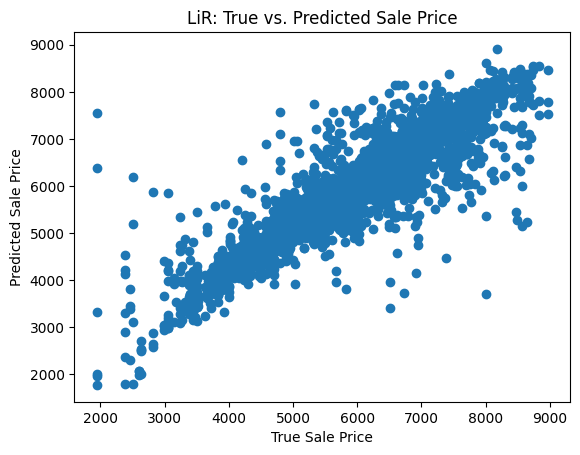

/tmp/ipykernel_20/602139934.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RFR
Mean Squared Error (MSE): 329655.38
Mean Absolute Error (MAE): 362.01
R-squared (R2): 0.81


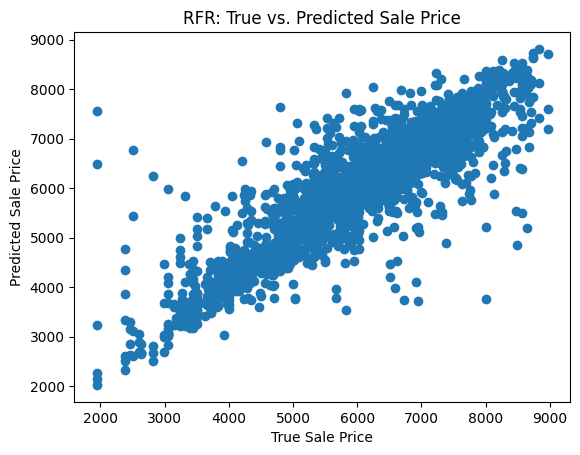

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBR
Mean Squared Error (MSE): 307427.41
Mean Absolute Error (MAE): 349.60
R-squared (R2): 0.83


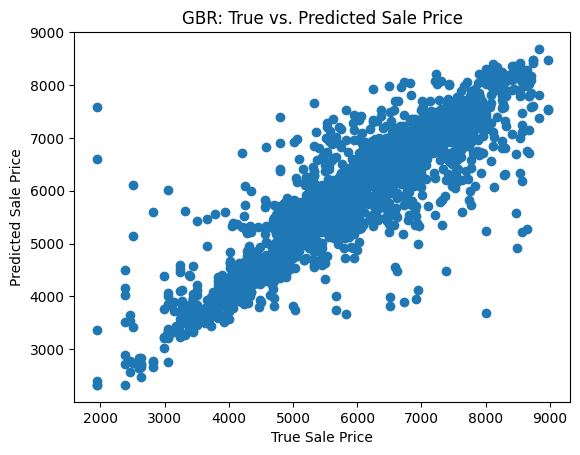

LGB
Mean Squared Error (MSE): 306289.32
Mean Absolute Error (MAE): 348.94
R-squared (R2): 0.83


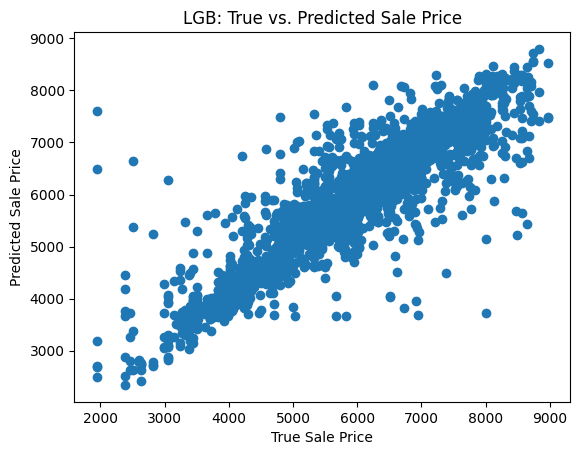

Final output store in submission.csv


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Models list
models = [
    ('LiR', LinearRegression()),
#     ('LoR', LogisticRegression()),
#     ('KNN', KNeighborsRegressor(n_neighbors=8)),
#     ('LSV', LinearSVR()),
#     ('SVR', SVR()),
    ('RFR', RandomForestRegressor()),
    ('GBR', GradientBoostingRegressor()),
    ('LGB', LGBMRegressor()),
#     ('CBR', CatBoostRegressor())
]

# Feature scaling
scacler = StandardScaler()
# x_scaled = scacler.fit_transform(x_train_data)
# predict_x_test =  scacler.fit_transform(X_test_data)

x_scaled = x_train_data
predict_x_test = X_test_data


x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y_train_data, test_size=0.2, random_state=42)

max_output_score, max_output_df = float('-inf'), None

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(name)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Sale Price")
    plt.ylabel("Predicted Sale Price")
    plt.title(f"{name}: True vs. Predicted Sale Price")
    plt.show()
    
    output = model.predict(predict_x_test)
    arr = test_data.loc[:,'id']
    output_df = pd.DataFrame({'id':arr, 'yield': output.flatten()})
    output_df.to_csv(f'/kaggle/working/{name}-output.csv', encoding='utf-8', index=False)
    
    # If it is most optimise solution then store in submission.csv
    if max_output_score < r2:
        max_output_score, max_output_df = r2, output_df.copy()

print('Final output store in submission.csv')
max_output_df.to_csv(f'/kaggle/working/submission.csv', encoding='utf-8', index=False)